<h1><center>Arunaggiri Pandian Karunanidhi</center></h1>

#### A. Load the /public/bmort/R/heart.csv data set into a data frame. Are there any missing values? Perform any necessary data imputation on the data set. 

In [264]:
df = read.csv("/public/bmort/R/heart.csv")

In [265]:
dim(df)

[1] 300  14

In [266]:
head(df, 5)

age,sex,pain,bp,chol,sugar,ecg,rate,angina,stv,sts,mvn,thal,disease
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [267]:
unique(df$disease)

[1] 0 1

In [268]:
# Count the missing values by column wise

print("Count of missing values by column wise")
sapply(df, function(x) sum(is.na(x)))

[1] "Count of missing values by column wise"


age     sex    pain      bp    chol   sugar     ecg    rate  angina     stv 
      0       0       0       0       0       0       0       0       0       0 
    sts     mvn    thal disease 
      0       0       0       0

## There are no missing values

#### B. Produce a table of summary statistics on the data set. How do the ranges of the values in the columns compare? Does each column of data have similar magnitudes and ranges? Are there any outliers?

In [269]:
summary(df)

      age             sex            pain             bp             chol      
 Min.   :29.00   Min.   :0.00   Min.   :1.000   Min.   : 94.0   Min.   :126.0  
 1st Qu.:48.00   1st Qu.:0.00   1st Qu.:3.000   1st Qu.:120.0   1st Qu.:211.0  
 Median :56.00   Median :1.00   Median :3.000   Median :130.0   Median :241.5  
 Mean   :54.48   Mean   :0.68   Mean   :3.153   Mean   :131.6   Mean   :246.9  
 3rd Qu.:61.00   3rd Qu.:1.00   3rd Qu.:4.000   3rd Qu.:140.0   3rd Qu.:275.2  
 Max.   :77.00   Max.   :1.00   Max.   :4.000   Max.   :200.0   Max.   :564.0  
     sugar             ecg              rate           angina      
 Min.   :0.0000   Min.   :0.0000   Min.   : 71.0   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.8   1st Qu.:0.0000  
 Median :0.0000   Median :0.5000   Median :153.0   Median :0.0000  
 Mean   :0.1467   Mean   :0.9867   Mean   :149.7   Mean   :0.3267  
 3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :2.0000

In [270]:
unique(df$sex)
unique(df$pain)
unique(df$sugar)
unique(df$angina)
unique(df$sts)
#unique(df$stv)
unique(df$thal)
unique(df$ecg)
unique(df$mvn)

[1] 1 0

[1] 1 4 3 2

[1] 1 0

[1] 0 1

[1] 3 2 1

[1] 6 3 7

[1] 2 0 1

[1] 0 3 2 1

In [271]:
## These columns are not continuous

In [272]:
# # normalize data using min-max normalization

# normalize <- function(x) {
# return ((x - min(x)) / (max(x) - min(x)))
# }


In [273]:
# df$age = normalize(df$age)

# df$bp = normalize(df$bp)

# df$rate = normalize(df$rate)

# df$stv = normalize(df$stv)

# df$chol = normalize(df$chol)


In [274]:
summary(df)

      age             sex            pain             bp             chol      
 Min.   :29.00   Min.   :0.00   Min.   :1.000   Min.   : 94.0   Min.   :126.0  
 1st Qu.:48.00   1st Qu.:0.00   1st Qu.:3.000   1st Qu.:120.0   1st Qu.:211.0  
 Median :56.00   Median :1.00   Median :3.000   Median :130.0   Median :241.5  
 Mean   :54.48   Mean   :0.68   Mean   :3.153   Mean   :131.6   Mean   :246.9  
 3rd Qu.:61.00   3rd Qu.:1.00   3rd Qu.:4.000   3rd Qu.:140.0   3rd Qu.:275.2  
 Max.   :77.00   Max.   :1.00   Max.   :4.000   Max.   :200.0   Max.   :564.0  
     sugar             ecg              rate           angina      
 Min.   :0.0000   Min.   :0.0000   Min.   : 71.0   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.8   1st Qu.:0.0000  
 Median :0.0000   Median :0.5000   Median :153.0   Median :0.0000  
 Mean   :0.1467   Mean   :0.9867   Mean   :149.7   Mean   :0.3267  
 3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :2.0000

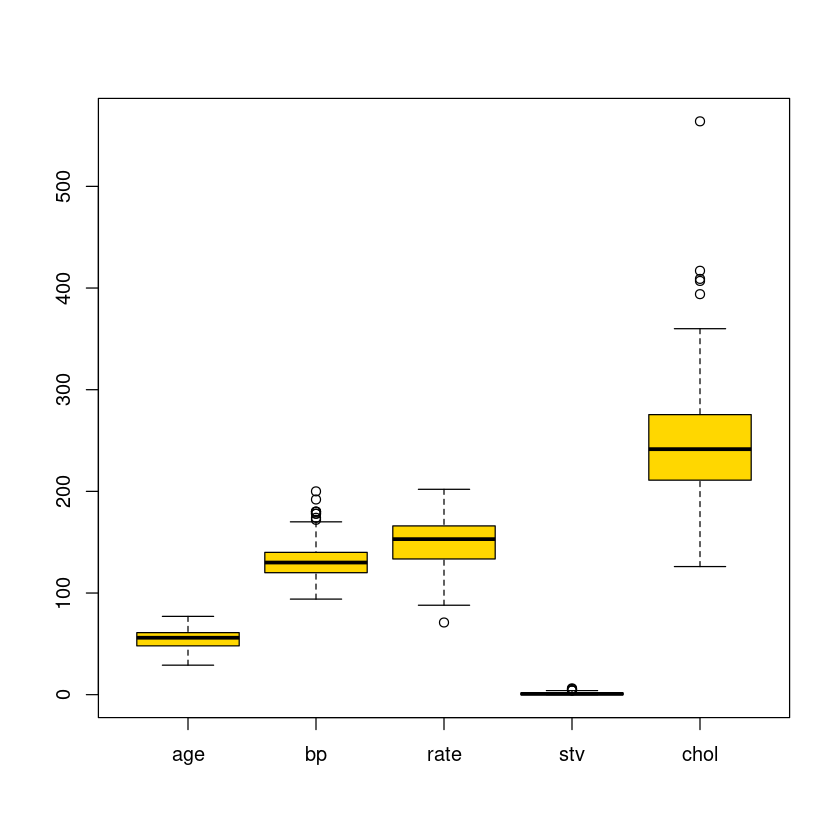

In [275]:
# plotting the data

out = df[, c('age', 'bp', 'rate', 'stv', 'chol')]
boxplot(out, col='gold')

### There are outliers in bp, rate, chol and stv columns

#### C. Partition the heart data set so that 80% will be used for training and 20% will be used for testing your machine learning model. 


In [276]:
library(caret)

In [277]:
intrain <- createDataPartition(y = df$disease, p= 0.8, list = FALSE)
train <- df[intrain,]
test <- df[-intrain,]

In [278]:
dim(train)

[1] 240  14

In [279]:
dim(test)

[1] 60 14

#### D. Using logistic regression as provided by the Caret library in R, develop a model to predict heart disease diagnosis based on the 13 features provided in the data set for each patient. 


In [280]:
train[["disease"]] = factor(train[["disease"]])

In [281]:
unique(train['disease'])

disease
<fct>
0
1


In [282]:
trctrl <- trainControl(method = "boot", number = 5)

In [283]:
# model <- train(disease ~., data = train, method = "glm",trControl=trctrl, preProcess = c("center", "scale"), tuneLength = 10) 

In [284]:
model

Generalized Linear Model 

240 samples
 13 predictor
  2 classes: '0', '1' 

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 192, 192, 193, 191, 192 
Resampling results:

  Accuracy   Kappa    
  0.8418042  0.6773503


In [285]:
summary(model)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5396  -0.4781  -0.2088   0.3381   2.4739  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.05785    0.21717  -0.266  0.78996    
age         -0.25838    0.25467  -1.015  0.31032    
sex          0.54477    0.26286   2.072  0.03822 *  
pain         0.58251    0.21529   2.706  0.00682 ** 
bp           0.23426    0.21704   1.079  0.28043    
chol         0.22962    0.21684   1.059  0.28964    
sugar       -0.23339    0.22816  -1.023  0.30633    
ecg          0.08934    0.21345   0.419  0.67554    
rate        -0.50998    0.28129  -1.813  0.06984 .  
angina       0.57865    0.22562   2.565  0.01033 *  
stv          0.48225    0.29832   1.617  0.10598    
sts          0.32218    0.26196   1.230  0.21874    
mvn          1.47934    0.29944   4.940  7.8e-07 ***
thal         0.56287    0.22745   2.475  0.01334 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

In [286]:
# let's apply our model to the test set 

test_pred <- predict(model, newdata = test)
test_pred

[1] 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1
[39] 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0
Levels: 0 1

In [287]:
# Compute model prediction accuracy rate

mean(test_pred == test$disease)

[1] 0.8833333

#### E. Generate a confusion matrix using the data from your test set to show the accuracy of the model. 

In [288]:
confusionMatrix(table(test_pred, test$disease))

Confusion Matrix and Statistics

         
test_pred  0  1
        0 30  5
        1  2 23
                                          
               Accuracy : 0.8833          
                 95% CI : (0.7743, 0.9518)
    No Information Rate : 0.5333          
    P-Value [Acc > NIR] : 7.387e-09       
                                          
                  Kappa : 0.764           
                                          
 Mcnemar's Test P-Value : 0.4497          
                                          
            Sensitivity : 0.9375          
            Specificity : 0.8214          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.9200          
             Prevalence : 0.5333          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.5833          
      Balanced Accuracy : 0.8795          
                                          
       'Positive' Class : 0               
                                          

#### F. Write a few sentences providing commentary on the accuracy of the model. What percent are false positives? What percent are false negatives? 

Accuracy of the model is <b>88.33%</b> <br>
False Positives = 2/60 = <b>3.33%</b> <br>
False Negatives = 5/60 = <b>8.33%</b>
